In [9]:
# =========================================
# Product Review Rating Predictor on Amazon Dataset
# =========================================

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

nltk.download('stopwords')

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\namis\Downloads\NLP Assignmment 21sept2025\archive 2\amazon_products_sales_data_cleaned.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\namis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Step 2: Map product_rating numeric to sentiment
def map_rating_to_sentiment(rating):
    if rating <= 2.5:
        return 'Negative'
    elif 2.5 < rating <= 3.5:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['product_rating'].apply(map_rating_to_sentiment)

In [11]:

# Step 3: Preprocess product titles (acts like review text)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_title'] = df['product_title'].apply(preprocess_text)

In [12]:
# Step 4: TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_title'])
y = df['sentiment']


In [13]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Step 6: Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [15]:
# Step 7: Predictions
y_pred = model.predict(X_test)

In [16]:
# Step 8: Evaluation
labels = ['Positive','Neutral','Negative']
cm = confusion_matrix(y_test, y_pred, labels=labels)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))

f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-Averaged F1 Score:", round(f1,4))

Confusion Matrix:
[[8283   19    0]
 [  37  163    0]
 [   1    0   32]]

Classification Report:

              precision    recall  f1-score   support

    Positive       1.00      0.97      0.98        33
     Neutral       0.90      0.81      0.85       200
    Negative       1.00      1.00      1.00      8302

    accuracy                           0.99      8535
   macro avg       0.96      0.93      0.94      8535
weighted avg       0.99      0.99      0.99      8535

Macro-Averaged F1 Score: 0.9449


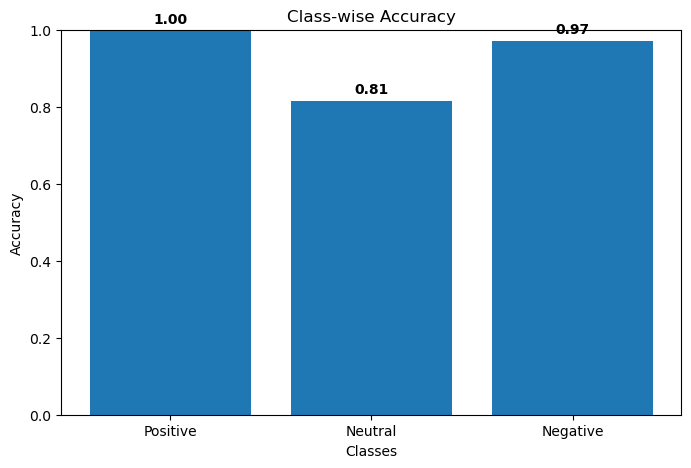

In [17]:
# Step 9: Bar chart comparing class-wise accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8,5))
plt.bar(labels, class_accuracy)
plt.ylim(0,1)
plt.title("Class-wise Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Classes")
for i, v in enumerate(class_accuracy):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [18]:

# Step 10: Predict sentiment for a new product title
def predict_sentiment(title):
    title_clean = preprocess_text(title)
    vec = tfidf.transform([title_clean])
    pred = model.predict(vec)[0]
    return pred

In [19]:
# Example usage:
sample_title = "Apple AirPods Pro 2 Wireless Earbuds, Active Noise Cancellation"
print("Predicted Sentiment:", predict_sentiment(sample_title))

Predicted Sentiment: Positive
